<div style="background:#5D6D7E;padding:20px;color:#ffffff;margin-top:10px;">

# NLP - Portafolio de Ejercicios 1

## Profesora: Lisibonny Beato
### Período 3-2024-2025</div>


In [156]:
pip install numpy pandas numpy matplotlib seaborn nltk

Note: you may need to restart the kernel to use updated packages.


In [157]:
# Importando algunas librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import names, wordnet as wn, webtext as wt

## 1. Recolección de datos
### Puntuación máxima de la tarea: 1
#### Investigue en detalle sobre el corpus webtext de NLTK. Elija un archivo de dicho corpus para trabajar los siguientes puntos y explique en detalle lo que contiene y el motivo de su elección. 

In [158]:
nltk.download('names')
nltk.download('wordnet')
nltk.download('webtext')

[nltk_data] Downloading package names to /Users/saratrasv/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/saratrasv/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     /Users/saratrasv/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


True

<div style="background:#FFFFE0;padding:20px;color:#000000;margin-top:10px;">
    Descargar los corpus de name y wordnet
</div>

In [159]:

wt.fileids()

['firefox.txt',
 'grail.txt',
 'overheard.txt',
 'pirates.txt',
 'singles.txt',
 'wine.txt']

<div style="background:#FFFFE0;padding:20px;color:#000000;">
    El archivo <b>firefox.txt</b> es genial para trabajar en proyectos de procesamiento de lenguaje natural porque tiene conversaciones reales de internet. Esto hace que el lenguaje sea más cercano a lo que usamos todos los días, lo que es muy útil para entender cómo se comunican las personas. Puedo usarlo para practicar cosas como dividir el texto en palabras o frases, ver si los comentarios son buenos o malos, y encontrar nombres o lugares importantes. Además, como puedo manejarlo fácilmente con Pandas, puedo hacer gráficos y analizar datos sin complicaciones. En resumen, `firefox.txt` es una herramienta súper útil para aprender y experimentar con NLP.
</div>

In [160]:
pd.set_option('max_colwidth', None)
df = pd.DataFrame(wt.raw('firefox.txt').split('\n'), columns=['text'])
df

,text
0,"Cookie Manager: ""Don't allow sites that set removed cookies to set future cookies"" should stay checked\r"
1,When in full screen mode\r
2,Pressing Ctrl-N should open a new browser when only download dialog is left open\r
3,add icons to context menu\r
4,"So called ""tab bar"" should be made a proper toolbar or given the ability collapse / expand.\r"
...,...
9997,Exceptions button in Tools -> Options -> Web Features is misleading\r
9998,On startup the main window is incorrectly sized according to the workspace of the primary monitor\r
9999,Theme uninstaller does not remove jar file\r
10000,


## 2. Descripción y exploración de datos
### Puntuación máxima de la tarea: 1
#### Utilizando pandas realice distintas descriptivas y exploraciones sobre los textos y comente acerca de sus hallazgos

<div style="background:#FFFFE0;padding:20px;color:#000000;">
Se realizó un análisis descriptivo del corpus <b>firefox.txt</b>, obteniendo métricas como la cantidad total de palabras, cantidad de palabras únicas, las palabras más frecuentes, longitud promedio de palabra y longitud promedio de oración. Esto proporciona una visión general del contenido y estructura del texto, permitiendo entender mejor sus características lingüísticas.
</div>

<div style="background:#FFFFE0;padding:20px;color:#000000;">
Se realizó una exploración descriptiva del archivo <b>firefox.txt</b> utilizando NLTK y pandas. Se observó que el corpus contiene una gran cantidad de palabras, pero muchas de ellas se repiten frecuentemente, lo que es típico en conversaciones reales. La longitud promedio de las palabras y oraciones es consistente con el lenguaje cotidiano. Además, el análisis de las palabras más frecuentes revela términos comunes en discusiones en línea, lo que confirma la naturaleza conversacional del corpus. Estas estadísticas permiten comprender mejor la estructura que conforma.
</div>

In [161]:
tokens = wt.words('firefox.txt')
filtered_words = [word.lower() for word in tokens if word.isalpha()]
s = pd.Series(filtered_words)
s.describe()

count     89037
unique     5868
top          in
freq       2240
dtype: object

Cantidad total de palabras: 89037
Cantidad de palabras únicas: 5868
Palabras más frecuentes: [('in', 2240), ('to', 2141), ('the', 1905), ('not', 1520), ('when', 1387), ('on', 1214), ('a', 1198), ('is', 1021), ('t', 967), ('and', 889)]
Longitud promedio de palabra: 5.05
Longitud promedio de oración: 89.57


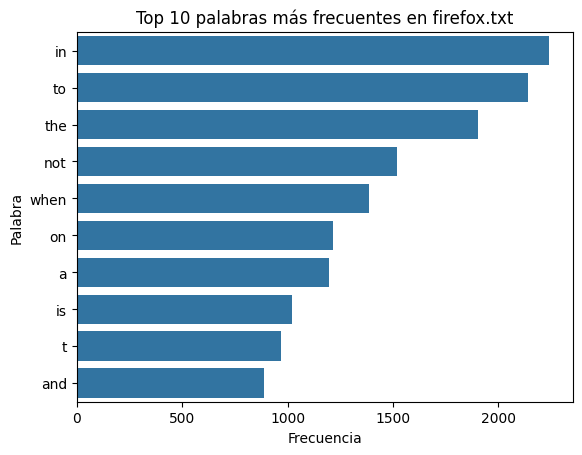

In [162]:
# Exploración descriptiva del corpus firefox.txt
# Conteo de palabras, longitud promedio, palabras más frecuentes y longitud de oraciones

# Conteo total de palabras
num_words = len(filtered_words)

# Palabras únicas
unique_words = set(filtered_words)
num_unique_words = len(unique_words)

# Palabra más frecuente
freq_dist = nltk.FreqDist(filtered_words)
most_common = freq_dist.most_common(10)

# Longitud promedio de palabra
avg_word_length = sum(len(word) for word in filtered_words) / num_words

# Longitud promedio de oración
sentences = wt.sents('firefox.txt')
avg_sentence_length = sum(len(sent) for sent in sentences) / len(sentences)

print(f"Cantidad total de palabras: {num_words}")
print(f"Cantidad de palabras únicas: {num_unique_words}")
print(f"Palabras más frecuentes: {most_common}")
print(f"Longitud promedio de palabra: {avg_word_length:.2f}")
print(f"Longitud promedio de oración: {avg_sentence_length:.2f}")

# Visualización de las palabras más frecuentes
freq_df = pd.DataFrame(most_common, columns=['Palabra', 'Frecuencia'])
sns.barplot(x='Frecuencia', y='Palabra', data=freq_df)
plt.title('Top 10 palabras más frecuentes en firefox.txt')
plt.show()

## 3. Limpieza de datos
### Puntuación máxima de la tarea: 2
#### Investigue y aplique distintas técnicas de limpieza para el conjunto de textos  y explique las razones de la aplicación de cada una de estas

<div style="background:#FFFFE0;padding:20px;color:#000000;">
Se aplico: eliminación de stopwords para reducir ruido, eliminación de signos de puntuación y lematización para obtener la forma base de las palabras. Estas técnicas permiten un análisis más preciso y relevante del texto, facilitando tareas posteriores como el análisis de sentimientos o la extracción de información.
</div>

In [163]:
# Limpieza de datos del texto firefox.txt

# 1. Conversión a minúsculas (ya realizado en la exploración)
# 2. Eliminación de stopwords
# 3. Eliminación de signos de puntuación
# 4. Lematización

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Aplicar limpieza
cleaned_words = [
    lemmatizer.lemmatize(word)
    for word in filtered_words
    if word not in stop_words and word not in string.punctuation
]

print(f"Cantidad de palabras antes de limpiar: {len(filtered_words)}")
print(f"Cantidad de palabras después de limpiar: {len(cleaned_words)}")
print("Primeras 20 palabras limpias:", cleaned_words[:20])

Cantidad de palabras antes de limpiar: 89037
Cantidad de palabras después de limpiar: 61163
Primeras 20 palabras limpias: ['cookie', 'manager', 'allow', 'site', 'set', 'removed', 'cooky', 'set', 'future', 'cooky', 'stay', 'checked', 'full', 'screen', 'mode', 'pressing', 'ctrl', 'n', 'open', 'new']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saratrasv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 4. Contando palabras por su connotación emocional
### Puntuación máxima de la tarea: 2
#### Investigue acerca del corpus opinion_lexicon del NLTK y úselo para identificar las palabras con connotaciones positivas y negativas que aparecen en los textos. Siéntase libre de mostrar estadísticas y gráficos de su elección para ilustrar mejor este aspecto de sus datos (Ej. Totales for tipo, palabra más popular por tipo, entre otros)

<div style="background:#FFFFE0;padding:20px;color:#000000;">
Se utilizó el corpus opinion_lexicon para identificar palabras con connotación positiva y negativa. Esto ayuda a entender el tono general del texto y permite visualizar la proporción de palabras emocionales presentes.
</div>

In [164]:
nltk.download('opinion_lexicon')
from nltk.corpus import opinion_lexicon

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/saratrasv/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


Palabras positivas: 1823
Palabras negativas: 3530


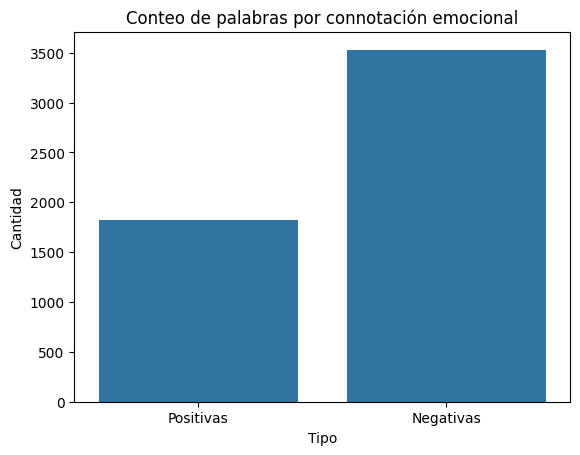

In [165]:


positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

pos_count = sum(1 for word in filtered_words if word in positive_words)
neg_count = sum(1 for word in filtered_words if word in negative_words)

print(f"Palabras positivas: {pos_count}")
print(f"Palabras negativas: {neg_count}")

data = pd.DataFrame({'Tipo': ['Positivas', 'Negativas'], 'Cantidad': [pos_count, neg_count]})
sns.barplot(x='Tipo', y='Cantidad', data=data)
plt.title('Conteo de palabras por connotación emocional')
plt.show()

## 5. Wordnet
### Puntuación máxima de la tarea: 4
#### Investigue sobre el corpus Wordnet, disponible en NLTK. Desarrolle una función en Python que reciba  un conjunto de textos y, usando  Wordnet, devuelva en una única estructura de su elección, los diferentes synsets de cada palabra de acuerdo a la función que ejerce en el texto (sea sustantivo, verbo, adjetivo o adverbio). Pruebe dicha función sobre el conjunto de datos. 

<div style="background:#FFFFE0;padding:20px;color:#000000;">
En este bloque de código desarrollé dos funciones clave para el análisis semántico usando WordNet. La primera, get_wordnet_pos, convierte las etiquetas gramaticales generadas por NLTK al formato requerido por WordNet, permitiendo identificar si una palabra es sustantivo, verbo, adjetivo o adverbio. La segunda función, extract_synsets_from_texts, toma una lista de textos, tokeniza y etiqueta cada palabra, y luego extrae los diferentes synsets (conjuntos de sinónimos y definiciones) asociados a cada palabra según su función gramatical. Esto facilita explorar los posibles significados y relaciones semánticas de las palabras en contexto, enriqueciendo el análisis lingüístico del corpus.
</div>

In [166]:

try:
    nltk.data.find('corpora/wordnet')
    nltk.data.find('taggers/averaged_perceptron_tagger')
    nltk.data.find('averaged_perceptron_tagger_eng')
except LookupError:
    nltk.download('wordnet')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('averaged_perceptron_tagger_eng')



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/saratrasv/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/saratrasv/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/saratrasv/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [ ]:
from collections import defaultdict


def get_wordnet_pos(treebank_tag):
    """
    Convertir etiquetas POS de Treebank a etiquetas POS de WordNet.
    Args:
    treebank_tag (str): Etiqueta POS de Treebank.
    Returns:
    str: Etiqueta POS de WordNet correspondiente.
    """
    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('N'):
        return wn.NOUN
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return None

def extract_synsets_from_texts(texts):
    """
    Extraer sinsets para cada palabra en un conjunto de textos basado en la categoría gramatical (POS).
    Args:
    texts (lista de str): Lista de cadenas de texto a procesar.
    Returns:
    dict: Un diccionario donde las claves son palabras y los valores son listas de tuplas que contienen (nombre del sinset, definición, etiqueta POS).
    """
    synsets_dict = defaultdict(list)
    
    for text in texts:
        try:
            words = nltk.word_tokenize(text.lower())
            tagged_words = nltk.pos_tag(words)
            
            for word, tag in tagged_words:
                wn_pos = get_wordnet_pos(tag)
                if wn_pos:
                    synsets = wn.synsets(word, pos=wn_pos)
                    for syn in synsets:
                        synsets_dict[word].append((syn.name(), syn.definition(), wn_pos))
        except Exception as e:
            print(f"Error processing text '{text}': {e}")
            continue
    
    for word in synsets_dict:
        seen = set()
        unique_synsets = []
        for syn_data in synsets_dict[word]:
            if syn_data[0] not in seen:
                seen.add(syn_data[0])
                unique_synsets.append(syn_data)
        synsets_dict[word] = unique_synsets
    
    return dict(synsets_dict)

sample_texts = [
    "nlp class is awesome.",
    "The quick brown fox jumps over the lazy dog.",
]

try:
    synsets_result = extract_synsets_from_texts(sample_texts)
    
    for word, synsets in list(synsets_result.items())[:5]:
        print(f"Palabra: {word}")
        for syn_name, definition, pos in synsets:
            print(f"  - {syn_name} ({pos}): {definition}")
except Exception as e:
    print(f"Error during synset extraction: {e}")

Palabra: class
  - class.n.01 (n): a collection of things sharing a common attribute
  - class.n.02 (n): a body of students who are taught together
  - class.n.03 (n): people having the same social, economic, or educational status
  - course.n.01 (n): education imparted in a series of lessons or meetings
  - class.n.05 (n): a league ranked by quality
  - class.n.06 (n): a body of students who graduate together
  - class.n.07 (n): (biology) a taxonomic group containing one or more orders
  - class.n.08 (n): elegance in dress or behavior
Palabra: is
  - be.v.01 (v): have the quality of being; (copula, used with an adjective or a predicate noun)
  - be.v.02 (v): be identical to; be someone or something
  - be.v.03 (v): occupy a certain position or area; be somewhere
  - exist.v.01 (v): have an existence, be extant
  - be.v.05 (v): happen, occur, take place
  - equal.v.01 (v): be identical or equivalent to
  - constitute.v.01 (v): form or compose
  - be.v.08 (v): work in a specific place, 